# Learning outcomes

* Introduce the participants to machine learning prediction tasks
    * regression tasks
    * classification tasks
* Introduce the participants to machine learning processing operations 
    * categorical data encoding
    * feature scaling
    * features selection
* Introduce the participants to tree-based machine learning models
    * decision trees
    * random forests
* Introduce the participants to machine learning evaluation metrics and methods

# Session guidlines

* Session materials are developed in python programming language  
* We will be using Jupyter notebooks in both sessions on Google Colab.
* Each session is divided into a set of tasks and subtasks 
* Task types:
    * Unsolved, participant should complete them during the session
    * Solved, participant should run them during the session and check results
    * Self-exercises, participant can do them later.  
* Each task is associated background information and references for extra reading
* Each subtask is provided with instructions and hints to facilitate the subtask completion 
    * Instructions: Tells you exactly what you have to accomplish and indicated as Task# e.g. Task1. 
    * Hint: Guide you on which function to use as well as the values to use for each function.
    * Instructions and hints are given as comment at the beginning of the cell and starting with (#), and being ignored by python
    * Cells with no instructions and hints should be run only without code modification  
* Shift+Enter to run Jupyter cell!


# Prediction tasks

## Regression tasks

**What is regression?**

Regression algorithms predict a **continuous value** based on the input variables. The main goal of regression problems is to estimate a mapping function based on the input and output variables. If your target variable is a quantity like income, scores, height or weight, or the probability of a binary category (like the probability of rain in particular regions), then you should use the regression model [1]. 


## Classification tasks

**What is classification?**

Classification is a predictive model that approximates a mapping function from input variables to identify **discrete output variables**, which can be labels or categories. The mapping function of classification algorithms is responsible for predicting the label or category of the given input variables. A classification algorithm can have both discrete and real-valued variables, but it requires that the examples be classified into one of two or more classes [1]. 

* Binary classification
* Multi-class classification
* Multi-label classification


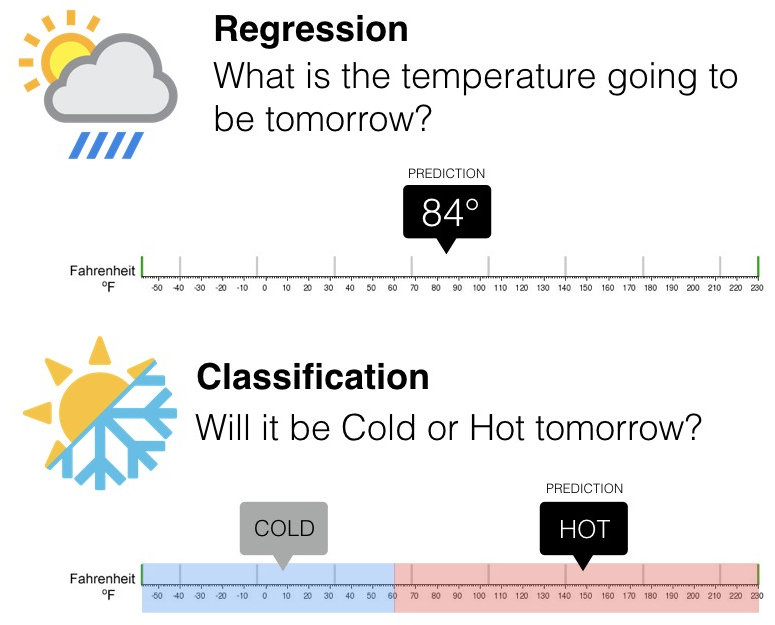

## References

[1] Sakshi Gupta, Regression vs. Classification in Machine Learning: What’s the Difference?. 2021. Avaialable from: https://www.springboard.com/blog/data-science/regression-vs-classification/

# Preprocessing operations

## Labels Encoding

Label encoding is a process of assigning numerical labels to categorical data values. It is a simple and efficient way to convert categorical data into numerical data that can be used for analysis and modelling. The basic idea of label encoding is to assign a unique integer to each category in a categorical variable. For example, if we have a categorical variable “colour” with categories “red”, “green”, and “blue”, we can assign the labels 0, 1, and 2 respectively. This allows us to represent the data numerically, which is necessary for many machine learning algorithms [1].

## Features scaling

**What is Feature scaling?**

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. Just to give you an example — if you have multiple independent variables like age, salary, and height; With their range as (18–100 Years), (25,000–75,000 Euros), and (1–2 Meters) respectively, feature scaling would help them all to be in the same range, for example- centered around 0 or in the range (0,1) depending on the scaling technique [2].

Now, since you have an idea of what is feature scaling. Let us explore what methods are available for doing feature scaling. Of all the methods available, the most common ones are:

### Data normalization

Also known as min-max scaling or min-max normalization, it is the simplest method and consists of rescaling the range of features to scale the range in [0, 1]. The general formula for normalization is given as:

$$x^{'} = \frac{x - min(x)}{max(x) - min(x)}$$

Here, $max(x)$ and $min(x)$ are the maximum and the minimum values of the feature respectively.

### Data standardization

Feature standardization makes the values of each feature in the data have zero mean and unit variance. The general method of calculation is to determine the distribution mean and standard deviation for each feature and calculate the new data point by the following formula:

$$x^{'} = \frac{x - \mu}{\sigma}$$




## Reference
[1] Saturncloud. Label Encoding. Avaialble from: https://saturncloud.io/glossary/label-encoding/

[2] Raghav Vashisht. When to perform a Feature Scaling?. 2021. Available from: https://www.atoti.io/articles/when-to-perform-a-feature-scaling/



# Tree-based models

## Decision tree model

**Decision Tree** is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where **decision nodes** represent the **features** of a dataset, **branches** represent the **decision rules** and each **leaf node** represents the **outcome**. **Decision nodes** are used to make any decision and have multiple branches, whereas **leaf nodes** are the output of those decisions and do not contain any further branches. Classification and Regression Tree algorithm [1] **(CART)** is a popular algorithm for decision tree model [2]. 

![image](https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png)


## Ensemble methods

Ensemble learning is a combination of several machine learning models in one problem. These models are known as weak learners. The intuition is that when you combine several weak learners, they can become strong learners. Each weak learner is fitted on the training set and provides predictions obtained. The final prediction result is computed by combining the results from all the weak learners [3]. 


**Strategies**
1. **Bagging:** Creating a different training subset from sample training data with replacement is called Bagging. The final output is based on majority voting [4]. 
2. **Boosting:** Combing weak learners into strong learners by creating sequential models such that the final model has the highest accuracy is called Boosting [4].

![image](https://www.simplilearn.com/ice9/free_resources_article_thumb/Working_of_RF_2.png)

## Random forest

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of **bagging** ensemble learning. As the name suggests, **Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset**. Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions to predicts the final output [5].

## References 

[1] De'ath G, Fabricius KE. Classification and regression trees: a powerful yet simple technique for ecological data analysis. Ecology. 2000 Nov;81(11):3178-92.

[2] Javatpoint. Decision Tree Classification Algorithm.
 Available from: https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm

[3] Derrick Mwiti. A Comprehensive Guide to Ensemble Learning: What Exactly Do You Need to Know. 2023. Available from: https://neptune.ai/blog/ensemble-learning-guide
 
[4] SimpleLearn. Random forest algorithm. Available from: https://www.simplilearn.com/tutorials/machine-learning-tutorial/random-forest-algorithm

[5] https://www.javatpoint.com/machine-learning-random-forest-algorithm

# Environment setup

In [1]:
# operating system functionalities
import os

# Linear algebra operations
import numpy as np 

# Data reading in Dataframe format and data preprocessing
import pandas as pd

# Data visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning modeling
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Data reading

In [3]:
preprocessed_data_path = os.path.join('.','data','preprocessed')

In [4]:
# data files reading
structural_full = pd.read_csv(os.path.join(preprocessed_data_path,'structural_data_full.csv'))
structural_left = pd.read_csv(os.path.join(preprocessed_data_path,'structural_data_left.csv'))
structural_right = pd.read_csv(os.path.join(preprocessed_data_path,'structural_data_right.csv'))
structural_visual = pd.read_csv(os.path.join(preprocessed_data_path,'structural_visual.csv'))
structural_moca = pd.read_csv(os.path.join(preprocessed_data_path,'structural_moca.csv'))
structural_handedness = pd.read_csv(os.path.join(preprocessed_data_path,'structural_handedness.csv'))

# Whole brain structural data for age prediction (Unsolved)

In [5]:
# Task1: encode the gender feature 
# Hint: use the LabelEncoder class to encode the gender feature
# gender_feature = 'sex'

### START CODE HERE ### (≈ 3 line of code)

# label_encoder = preprocessing.
# genders = label_encoder.fit_transform(structural_full['gender_feature'])
# structural_left['sex'] = 

### END CODE HERE ###

# Solution:
label_encoder = preprocessing.LabelEncoder()
genders = label_encoder.fit_transform(structural_full['sex'])
structural_full['sex'] = genders

In [6]:
# print gender encoding mapping
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
mapping

{'F': 0, 'M': 1}

In [7]:
# Tasks2: scale the structural data following the normal distribution 
# Hint: use the StandardScaler() to scale the features according to the normal distribution

### START CODE HERE ### (≈ 3 line of code)

# scaler = preprocessing.
# scaled_data = scaler.fit_transform()
# structural_full.iloc[:,1:-2] = 

### END CODE HERE ###

# Solution:
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(structural_full.iloc[:,2:-1])
structural_full.iloc[:,2:-1] = scaled_data

In [8]:
# Tasks3: split the data as  90% train, 10% test splits 
# Hint: Use train_test_split() function to split the data into the target split

# Configs: 
# features = x
# class = y
# test_size = 0.1
# random_state = 5

### START CODE HERE ### (≈ 3 line of code)

# x = np.array('specify the feature columns here')
# y = np.array('specify the class column here')
# x_train, x_test, y_train, y_test = train_test_split('features','class', test_size= , random_state=)

### END CODE HERE ###

# Solution:
x = np.array(structural_full.iloc[:,1:-1])
y = np.array(structural_full['age'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 5)

In [9]:
# Task4: build the random forest model and train it
# Hint: use RandomForestRegressor() class to build the model and model.fit() to fit the model

# Configs: 
# n_estimators= 408
# max_depth= 11
# random_state = 16
# training_data = x_trian
# training_labels = y_train 

### START CODE HERE ### (≈ 2 line of code)

# model = RandomForestRegressor(n_estimators=,max_depth=,random_state=)
# model.fit('training_data','training_labels')

### END CODE HERE ###

# Solution:
model = RandomForestRegressor(n_estimators=408,max_depth=11,random_state=16)
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=11, n_estimators=408, random_state=16)

In [10]:
# Task5: make predictions on the test set and evaluate the model
# Hint: use model.predict() function and metrics.mean_absolute_error() to evaluate the fitted model

# Configs:
# X = x_test
# y_true= y_train
# y_pred= predictions

### START CODE HERE ### (≈ 2 line of code)

# predictions = model.predict(X=x_test)
# mae = metrics.mean_absolute_error(y_true=, y_pred=)
# print(f'mean absolute error = {mae}')

### END CODE HERE ###

# Solution:
predictions = model.predict(X=x_test)
mae = metrics.mean_absolute_error(y_true=y_test,y_pred=predictions)
print(f'mean absolute error = {round(mae,2)}')

mean absolute error = 6.39


the most important 10 features are:

WM-hypointensities: 0.424
3rd-Ventricle: 0.129
Left-Accumbens-area: 0.060
Left-Thalamus: 0.028
Right-Inf-Lat-Vent: 0.020
Left-Hippocampus: 0.017
Right-Putamen: 0.014
Right-Lateral-Ventricle: 0.012
Left-Putamen: 0.011
Right-Thalamus: 0.009




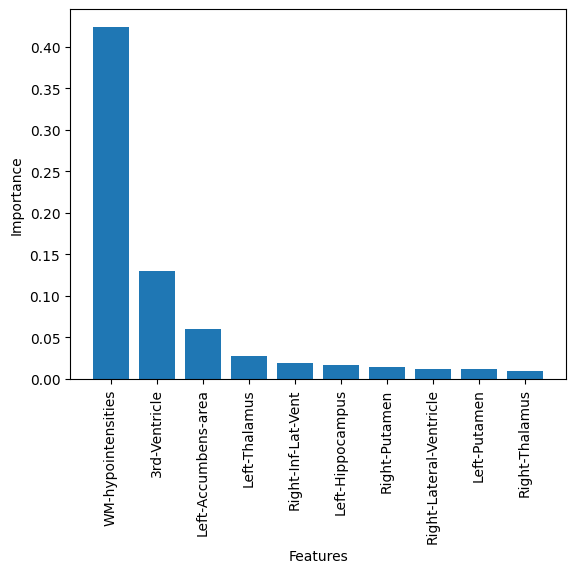

In [12]:
# Features importance visualization 
features = [(structural_full.iloc[:,1:-1].columns[i], v) for i,v in enumerate(model.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)

keys = []
values = []

print('the most important 10 features are:\n')
for item in features[:10]:
    keys.append(item[0])
    values.append(item[1])
    print("{0}: {1:0.3f}".format(item[0], item[1]))

print('\n')
plt.bar(x=keys,height=values)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(ticks=keys, rotation=90)
plt.show()

In [101]:
# data descaling
original_data = scaler.inverse_transform(structural_full.iloc[:,2:-1])
structural_full.iloc[:,2:-1] = original_data

<Axes: xlabel='Left-Accumbens-area', ylabel='age'>

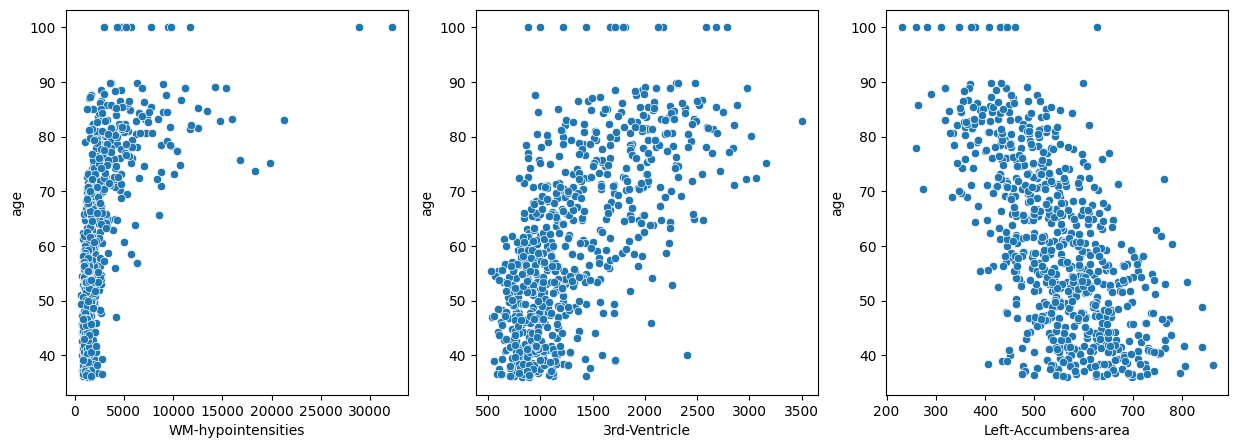

In [102]:
# Top 3 features visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
sns.scatterplot(ax=axes[0],data=structural_full,x=features[0][0],y='age')
sns.scatterplot(ax=axes[1],data=structural_full,x=features[1][0],y='age')
sns.scatterplot(ax=axes[2],data=structural_full,x=features[2][0],y='age')

# Right hemisphere structural data for age prediction (Solved)

In [14]:
# Task1: encode the gender feature 

### START CODE HERE ### (≈ 1 line of code)

structural_right['sex'] = genders

### END CODE HERE ###


In [15]:
# Tasks2: scale the structural data following the normal distribution 

### START CODE HERE ### (≈ 3 line of code)

scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(structural_right.iloc[:,2:-1])
structural_right.iloc[:,2:-1] = scaled_data

### END CODE HERE ###

In [16]:
# Tasks3: split the data as  90% train, 10% test splits 

### START CODE HERE ### (≈ 3 line of code)

x = np.array(structural_right.iloc[:,1:-1])
y = np.array(structural_right['age'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state= 5)

### END CODE HERE ###

In [17]:
# Task4: build the random forest model and train it

### START CODE HERE ### (≈ 2 line of code)

model = RandomForestRegressor(n_estimators=408,max_depth=11,random_state=16)
model.fit(x_train,y_train)

### END CODE HERE ###

RandomForestRegressor(max_depth=11, n_estimators=408, random_state=16)

In [18]:
# Task4: make prediction on the test set and evaluate the model


### START CODE HERE ### (≈ 3 line of code)

predictions = model.predict(X=x_test)
mae = metrics.mean_absolute_error(y_true=y_test,y_pred=predictions)
print(f'mean absolute error = {round(mae,2)}')

### END CODE HERE ###

mean absolute error = 8.32


the most important 10 features are:

Right-Inf-Lat-Vent: 0.258
Right-Lateral-Ventricle: 0.249
Right-Thalamus: 0.074
Right-Hippocampus: 0.030
Right-Cerebellum-White-Matter: 0.028
Right-VentralDC: 0.027
Right-Putamen: 0.020
Right-Accumbens-area: 0.015
Right-Amygdala: 0.015
Right-Caudate: 0.013




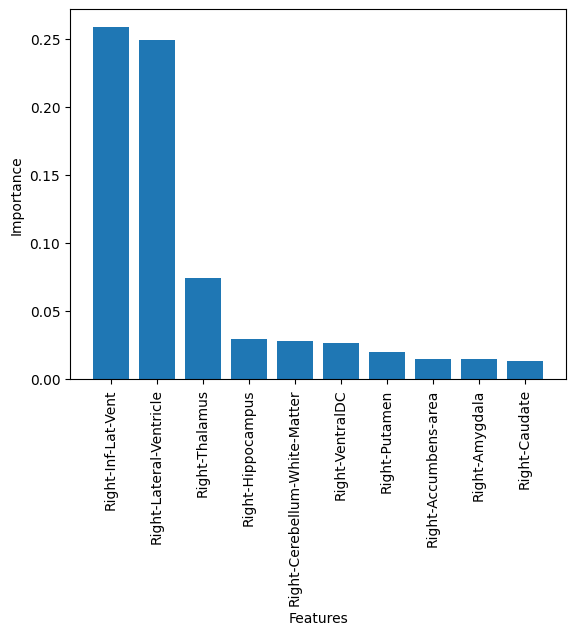

In [19]:
# Features importance
features = [(structural_right.iloc[:,1:-1].columns[i], v) for i,v in enumerate(model.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)

keys = []
values = []

print('the most important 10 features are:\n')
for item in features[:10]:
    keys.append(item[0])
    values.append(item[1])
    print("{0}: {1:0.3f}".format(item[0], item[1]))

print('\n')
plt.bar(x=keys,height=values)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(ticks=keys, rotation=90)
plt.show()

In [20]:
# data descaling 
original_data = scaler.inverse_transform(structural_right.iloc[:,2:-1])
structural_right.iloc[:,2:-1] = original_data

<Axes: xlabel='Right-Thalamus', ylabel='age'>

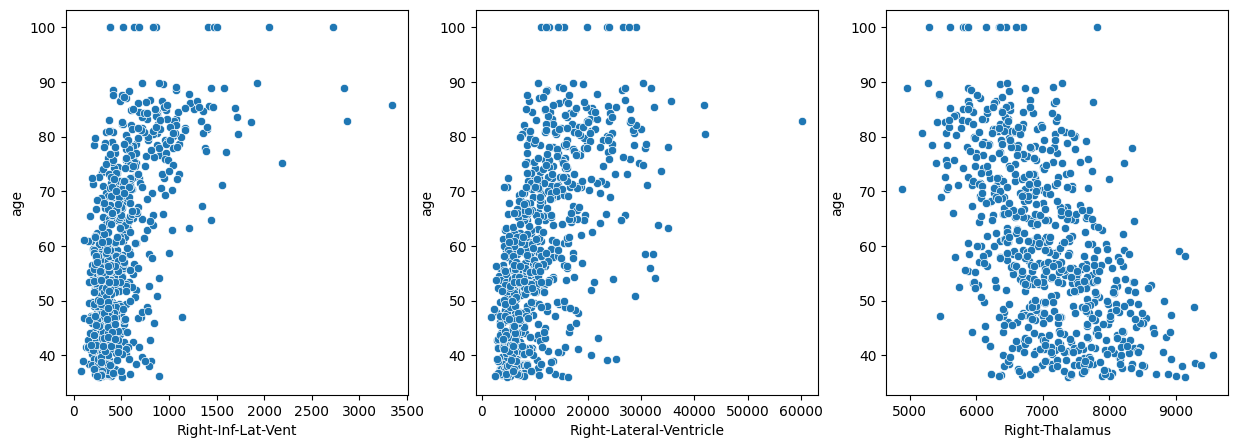

In [21]:
# Top 3 features visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
sns.scatterplot(ax=axes[0],data=structural_right,x=features[0][0],y='age')
sns.scatterplot(ax=axes[1],data=structural_right,x=features[1][0],y='age')
sns.scatterplot(ax=axes[2],data=structural_right,x=features[2][0],y='age')

# Left hemisphere structural data for age prediction (Solved)

In [22]:
# Task1: encode the gender feature 

### START CODE HERE ### (≈ 1 line of code)

structural_left['sex'] = genders

### END CODE HERE ###

In [23]:
# Tasks2: scale the structural data following the normal distribution 

### START CODE HERE ### (≈ 3 line of code)

scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(structural_left.iloc[:,2:-1])
structural_left.iloc[:,2:-1] = scaled_data

### END CODE HERE ###

In [24]:
# Tasks3: split the data as  90% train, 10% test splits 

### START CODE HERE ### (≈ 3 line of code)

x = np.array(structural_left.iloc[:,1:-1])
y = np.array(structural_left['age'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state= 5)

### END CODE HERE ###

In [25]:
# Task4: build the random forest model and train it

### START CODE HERE ### (≈ 2 line of code)

model = RandomForestRegressor(n_estimators=408,max_depth=11,random_state=16)
model.fit(x_train,y_train)

### END CODE HERE ###

RandomForestRegressor(max_depth=11, n_estimators=408, random_state=16)

In [26]:
# Task4: make prediction on the test set and evaluate the model

### START CODE HERE ### (≈ 3 line of code)

predictions = model.predict(X=x_test)
mae = metrics.mean_absolute_error(y_true=y_test,y_pred=predictions)
print(f'mean absolute error = {round(mae,2)}')

### END CODE HERE ###


mean absolute error = 7.55


the most important 10 features are:

Left-Inf-Lat-Vent: 0.244
Left-Lateral-Ventricle: 0.173
Left-Accumbens-area: 0.164
Left-Thalamus: 0.040
Left-Hippocampus: 0.032
Left-choroid-plexus: 0.020
Left-Cerebellum-White-Matter: 0.018
Left-Amygdala: 0.017
Left-Putamen: 0.015
ctx-lh-superiortemporal: 0.012




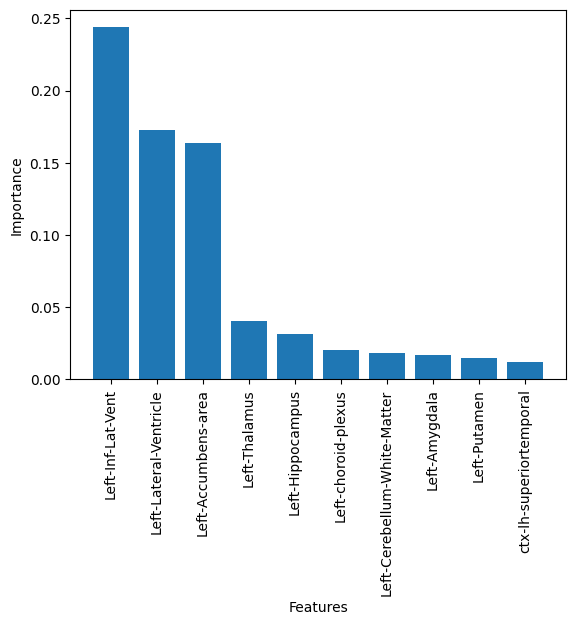

In [28]:
# Features importance
features = [(structural_left.iloc[:,1:-1].columns[i], v) for i,v in enumerate(model.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)

keys = []
values = []
print('the most important 10 features are:\n')
for item in features[:10]:
    keys.append(item[0])
    values.append(item[1])
    print("{0}: {1:0.3f}".format(item[0], item[1]))

print('\n')
plt.bar(x=keys,height=values)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(ticks=keys, rotation=90)
plt.show()

In [29]:
# data descaling
original_data = scaler.inverse_transform(structural_left.iloc[:,2:-1])
structural_left.iloc[:,2:-1] = original_data

<Axes: xlabel='Left-Accumbens-area', ylabel='age'>

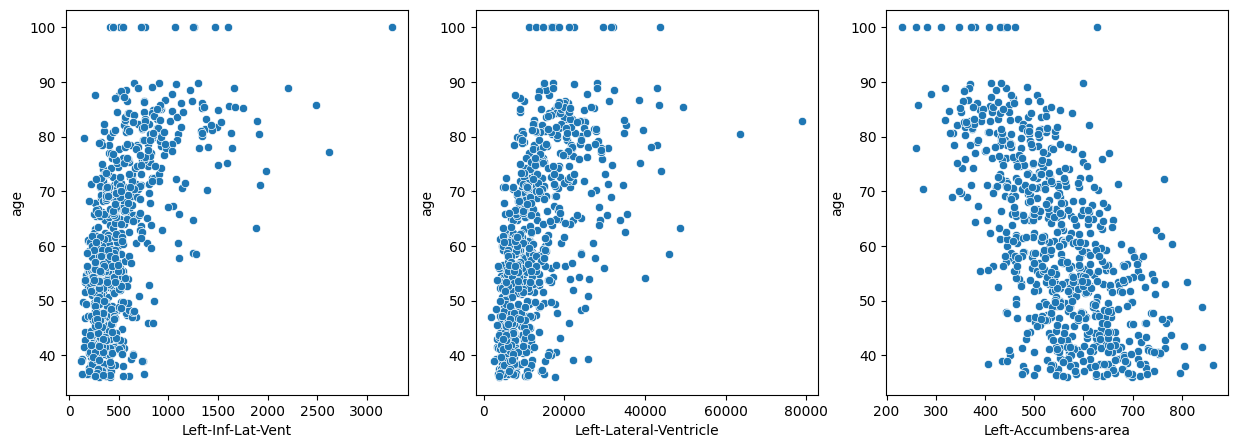

In [30]:
# Top 3 features visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
sns.scatterplot(ax=axes[0],data=structural_left,x=features[0][0],y='age')
sns.scatterplot(ax=axes[1],data=structural_left,x=features[1][0],y='age')
sns.scatterplot(ax=axes[2],data=structural_left,x=features[2][0],y='age')

# Cognitive impairment prediction (Unsolved)

In [31]:
# Task1: encode the gender feature 
# Hint: replace the gender encodings performed in whole brain data with the gender features in structural_moca table

### START CODE HERE ### (≈ 1 line of code)

# structural_moca['sex'] = 

### END CODE HERE ###

# Solution:
structural_moca['sex'] = genders

In [32]:
# Task2: encode the target values 
# Hint: use the LabelEncoder class to encode the target values

### START CODE HERE ### (≈ 3 line of code)

# label_encoder = preprocessing.
# classes = label_encoder.fit_transform("specify the gender column here")
# structural_moca['target'] = 

### END CODE HERE ###

# Solution:
label_encoder = preprocessing.LabelEncoder()
classes = label_encoder.fit_transform(structural_moca['target'])
structural_moca['target'] = classes

In [33]:
# print target encoding mapping
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
mapping

{'mild': 0, 'normal': 1}

In [34]:
# Tasks3: scale the structural data following the normal distribution 
# Hint: use the StandardScaler() to scale the features according to the normal distribution

### START CODE HERE ### (≈ 3 line of code)

# scaler = preprocessing.
# scaled_data = scaler.fit_transform()
# structural_moca.iloc[:,1:-2] = 

### END CODE HERE ###

# Solution:
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(structural_moca.iloc[:,2:-1])
structural_moca.iloc[:,2:-1] = scaled_data

In [35]:
# Tasks4: split the data as  90% train, 10% test splits 
# Hint: Use train_test_split() function to split the data into the target split

# Configs: 
# features = x
# class = y
# test_size = 0.1
# random_state = 5

### START CODE HERE ### (≈ 3 line of code)

# x = np.array('specify the feature columns here')
# y = np.array('specify the class column here')
# x_train, x_test, y_train, y_test = train_test_split('features','class', test_size= , random_state=)

### END CODE HERE ###

# Solution:
x = np.array(structural_moca.iloc[:,1:-1])
y = np.array(structural_moca['target'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 5)

In [36]:
# Task5: build the random forest model and train it
# Hint: use RandomForestRegressor() class to build the model and model.fit() to fit the model on the data

# Configs: 
# n_estimators= 408
# max_depth= 11
# random_state = 16
# training_data = x_trian
# training_labels = y_train 

### START CODE HERE ### (≈ 2 line of code)

# model = RandomForestRegressor(n_estimators=,max_depth=,random_state=)
# model.fit('training_data','training_labels')

### END CODE HERE ###

# Solution:
model = RandomForestClassifier(n_estimators=966,max_depth=10,random_state=12)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=966, random_state=12)

In [37]:
# Task6: make prediction on the test set and evaluate the model
# Hint: use model.predict() function and metrics.mean_absolute_error() to evaluate the fitted model

# Configs:
# X = x_test
# y_true= y_train
# y_pred= predictions

### START CODE HERE ### (≈ 2 line of code)

# predictions = model.predict(X=x_test)
# mae = metrics.mean_absolute_error(y_true=, y_pred=)
# print(f'mean absolute error = {mae}')

### END CODE HERE ###

# Solution:
predictions = model.predict(X=x_test)
acc = metrics.accuracy_score(y_true=y_test,y_pred=predictions)
print(f'accuracy = {round(acc,3)*100}%')

accuracy = 75.3%


the most important 10 features are:

age: 0.020
ctx-lh-entorhinal: 0.019
Right-Inf-Lat-Vent: 0.018
WM-hypointensities: 0.018
Right-Lateral-Ventricle: 0.016
ctx-rh-postcentral: 0.016
Left-Inf-Lat-Vent: 0.015
ctx-lh-medialorbitofrontal: 0.015
Left-Amygdala: 0.015
Right-Cerebellum-Cortex: 0.014




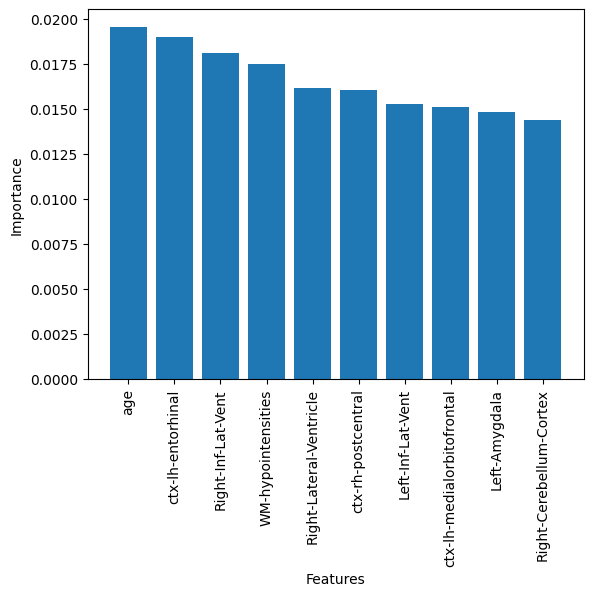

In [38]:
features = [(structural_moca.iloc[:,1:-1].columns[i], v) for i,v in enumerate(model.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)

keys = []
values = []
print('the most important 10 features are:\n')
for item in features[:10]:
    keys.append(item[0])
    values.append(item[1])
    print("{0}: {1:0.3f}".format(item[0], item[1]))

print('\n')
plt.bar(x=keys,height=values)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(ticks=keys, rotation=90)
plt.show()

In [39]:
# data descaling
original_data = scaler.inverse_transform(structural_moca.iloc[:,2:-1])
structural_moca.iloc[:,2:-1] = original_data

<Axes: xlabel='target', ylabel='Right-Inf-Lat-Vent'>

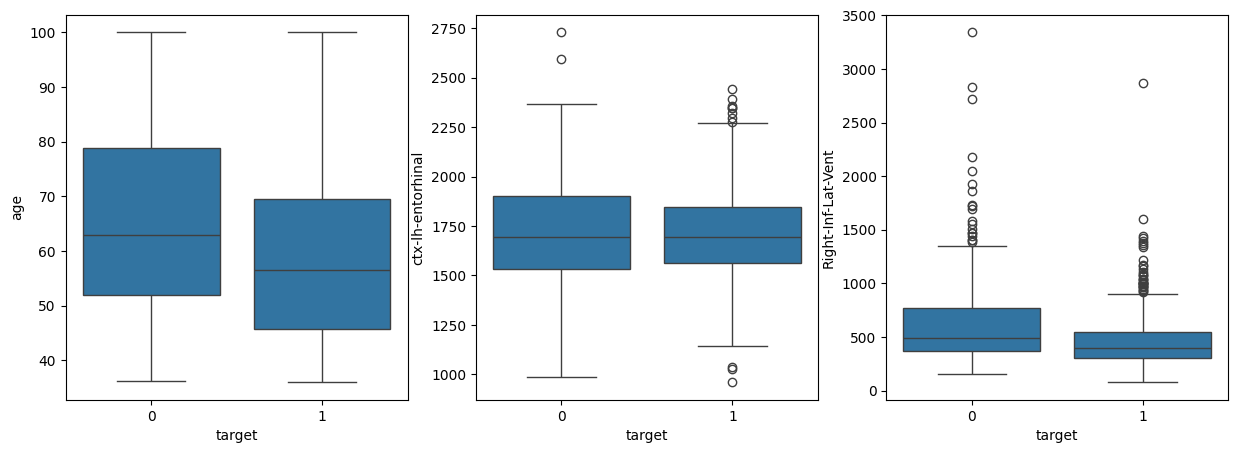

In [40]:
# Top 3 features visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
sns.boxplot(ax=axes[0],data=structural_moca,y=features[0][0],x='target')
sns.boxplot(ax=axes[1],data=structural_moca,y=features[1][0],x='target')
sns.boxplot(ax=axes[2],data=structural_moca,y=features[2][0],x='target')

# Visual acuity prediction (Solved)

In [41]:
# Task1: encode the gender feature 

### START CODE HERE ### (≈ 3 line of code)

label_encoder = preprocessing.LabelEncoder()
va_genders = label_encoder.fit_transform(structural_visual['sex'])
structural_visual['sex'] = va_genders

### END CODE HERE ###

In [42]:
# Task2: encode the target values 
# Hint: use the LabelEncoder class to encode the target values

### START CODE HERE ### (≈ 3 line of code)

# label_encoder = preprocessing.LabelEncoder()
# classes = label_encoder.fit_transform("specify the gender column here")
# structural_moca['target'] = 

### END CODE HERE ###

# Solution:
label_encoder = preprocessing.LabelEncoder()
classes = label_encoder.fit_transform(structural_visual['target'])
structural_visual['target'] = classes

In [43]:
# print target encoding mapping
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
mapping

{'better': 0, 'worse': 1}

In [44]:
# Tasks3: scale the structural data following the normal distribution 

### START CODE HERE ### (≈ 3 line of code)

scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(structural_visual.iloc[:,2:-1])
structural_visual.iloc[:,2:-1] = scaled_data

### END CODE HERE ###

In [45]:
# Tasks4: split the data as  90% train, 10% test splits 

### START CODE HERE ### (≈ 3 line of code)

x = np.array(structural_visual.iloc[:,1:-1])
y = np.array(structural_visual['target'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state= 5)

### END CODE HERE ###

In [46]:
# Task5: build the random forest model and train it

### START CODE HERE ### (≈ 2 line of code)

model = RandomForestClassifier(n_estimators=408,max_depth=11,random_state=16)
model.fit(x_train,y_train)

### END CODE HERE ###

RandomForestClassifier(max_depth=11, n_estimators=408, random_state=16)

In [47]:
# Task6: make prediction on the test set and evaluate the model


### START CODE HERE ### (≈ 3 line of code)

predictions = model.predict(X=x_test)
acc = metrics.accuracy_score(y_true=y_test,y_pred=predictions)
print(f'accuracy = {round(acc,4)*100}%')

### END CODE HERE ###

accuracy = 69.84%


the most important 10 features are:

age: 0.036
Left-Thalamus: 0.032
Left-Amygdala: 0.027
Right-VentralDC: 0.020
WM-hypointensities: 0.020
ctx-rh-inferiortemporal: 0.020
Left-VentralDC: 0.019
Right-Hippocampus: 0.017
3rd-Ventricle: 0.015
Right-Thalamus: 0.015




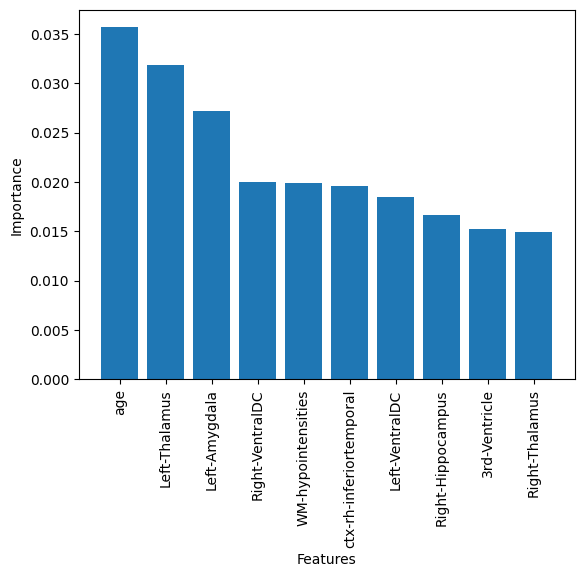

In [48]:
features = [(structural_visual.iloc[:,1:-1].columns[i], v) for i,v in enumerate(model.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)

keys = []
values = []
print('the most important 10 features are:\n')
for item in features[:10]:
    keys.append(item[0])
    values.append(item[1])
    print("{0}: {1:0.3f}".format(item[0], item[1]))

print('\n')
plt.bar(x=keys,height=values)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(ticks=keys, rotation=90)
plt.show()

In [49]:
# data descaling
original_data = scaler.inverse_transform(structural_visual.iloc[:,2:-1])
structural_visual.iloc[:,2:-1] = original_data

<Axes: xlabel='target', ylabel='Left-Amygdala'>

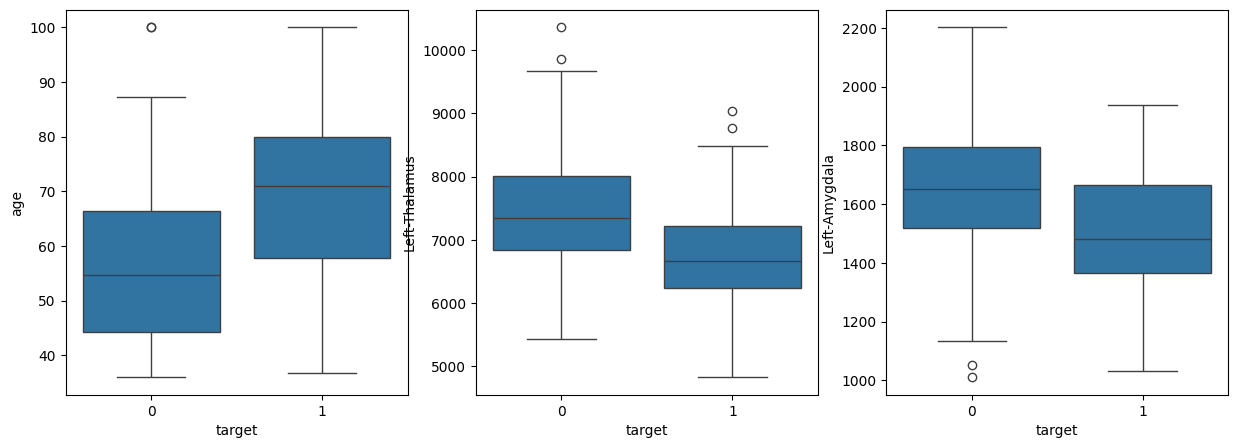

In [50]:
# Top 3 features visulaization

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
sns.boxplot(ax=axes[0],data=structural_visual,y=features[0][0],x='target')
sns.boxplot(ax=axes[1],data=structural_visual,y=features[1][0],x='target')
sns.boxplot(ax=axes[2],data=structural_visual,y=features[2][0],x='target')

# handedness prediction (Self exercise)

In [51]:
# Task1: encode the gender feature 
# Hint: replace the gender encodings performed in whole brain data with the gender features in handedness table

### START CODE HERE ### (≈ 1 line of code)

# structural_handedness['sex'] = 

### END CODE HERE ###

# Solution:
structural_handedness['sex'] = genders

In [52]:
# Task2: encode the class values 
# Hint: use the LabelEncoder class to encode the gender feature

### START CODE HERE ### (≈ 3 line of code)

# label_encoder = preprocessing.
# classes = label_encoder.fit_transform("specify the gender column here")
# structural_handedness['class'] = 

### END CODE HERE ###

# Solution:
label_encoder = preprocessing.LabelEncoder()
classes = label_encoder.fit_transform(structural_handedness['target'])
structural_handedness['target'] = classes

In [53]:
# print gender encoding mapping
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
mapping

{'L': 0, 'R': 1}

In [54]:
# Tasks3: scale the structural data following the normal distribution 
# Hint: use the StandardScaler() to scale the features according to the normal distribution

### START CODE HERE ### (≈ 3 line of code)

# scaler = preprocessing.
# scaled_data = scaler.fit_transform()
# structural_handedness.iloc[:,1:-2] = 

### END CODE HERE ###

# Solution:
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(structural_handedness.iloc[:,2:-1])
structural_handedness.iloc[:,2:-1] = scaled_data

In [55]:
# Tasks4: split the data as  90% train, 10% test splits 
# Hint: Use train_test_split() function to split the data into the target split

# Configs: 
# features = x
# class = y
# test_size = 0.1
# random_state = 5

### START CODE HERE ### (≈ 3 line of code)

# x = np.array('specify the feature columns here')
# y = np.array('specify the class column here')
# x_train, x_test, y_train, y_test = train_test_split('features','class', test_size= , random_state=)

### END CODE HERE ###

# Solution:
x = np.array(structural_handedness.iloc[:,1:-1])
y = np.array(structural_handedness['target'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 5)

In [56]:
# Task5: build the random forest model and train it
# Hint: use RandomForestRegressor() class to build the model and model.fit() to fit the model on the data

# Configs: 
# n_estimators= 408
# max_depth= 11
# random_state = 16
# training_data = x_trian
# training_labels = y_train 

### START CODE HERE ### (≈ 2 line of code)

# model = RandomForestRegressor(n_estimators=,max_depth=,random_state=)
# model.fit('training_data','training_labels')

### END CODE HERE ###

# Solution:
model = RandomForestClassifier(n_estimators=408,max_depth=11,random_state=16)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=11, n_estimators=408, random_state=16)

In [57]:
# Task6: make prediction on the test set and evaluate the model
# Hint: use model.predict() function and metrics.mean_absolute_error() to evaluate the fitted model

# Configs:
# X = x_test
# y_true= y_train
# y_pred= predictions

### START CODE HERE ### (≈ 2 line of code)

# predictions = model.predict(X=x_test)
# mae = metrics.mean_absolute_error(y_true=, y_pred=)
# print(f'mean absolute error = {mae}')

### END CODE HERE ###

# Solution:
predictions = model.predict(X=x_test)
acc = metrics.accuracy_score(y_true=y_test,y_pred=predictions)
print(f'accuracy = {round(acc,10)*100}%')

accuracy = 93.15068493000001%


the most important 10 features are:

ctx-lh-parstriangularis: 0.026
ctx-rh-parstriangularis: 0.023
ctx-lh-parsopercularis: 0.021
ctx-rh-superiorparietal: 0.020
ctx-lh-entorhinal: 0.018
ctx-rh-lingual: 0.017
ctx-rh-parahippocampal: 0.016
ctx-lh-pericalcarine: 0.015
ctx-lh-lingual: 0.015
ctx-lh-superiortemporal: 0.015




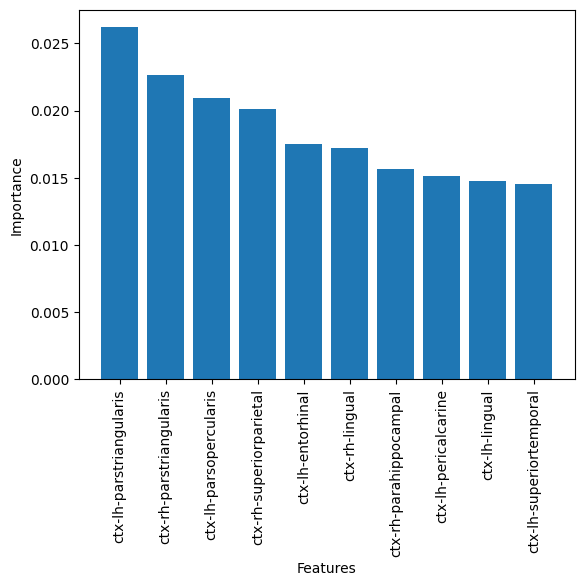

In [58]:
features = [(structural_handedness.iloc[:,1:-1].columns[i], v) for i,v in enumerate(model.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)

keys = []
values = []
print('the most important 10 features are:\n')
for item in features[:10]:
    keys.append(item[0])
    values.append(item[1])
    print("{0}: {1:0.3f}".format(item[0], item[1]))

print('\n')
plt.bar(x=keys,height=values)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(ticks=keys, rotation=90)
plt.show()

In [59]:
# data descaling
original_data = scaler.inverse_transform(structural_handedness.iloc[:,2:-1])
structural_handedness.iloc[:,2:-1] = original_data

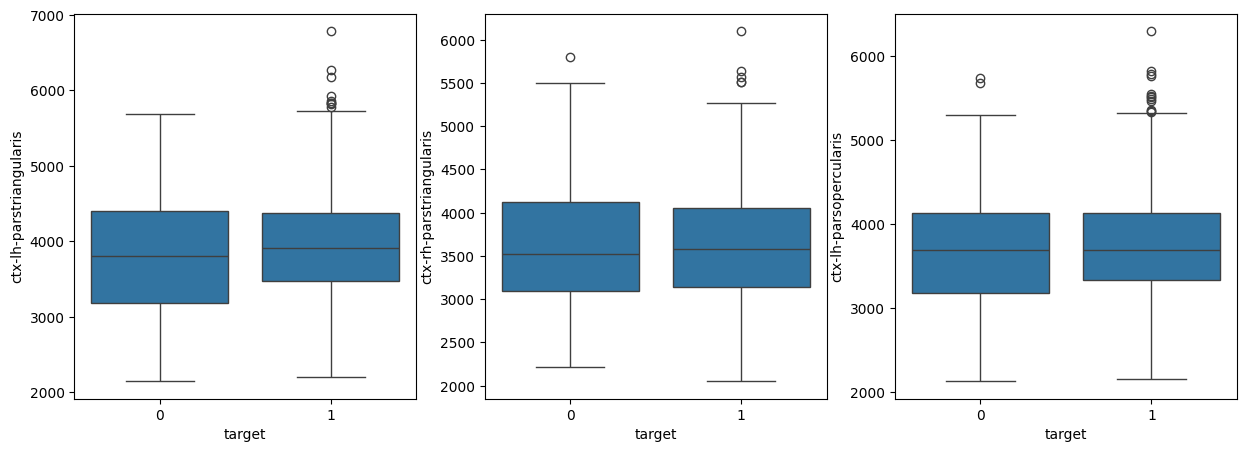

In [60]:
# Top 3 features visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
sns.boxplot(ax=axes[0],data=structural_handedness,y=features[0][0],x='target')
sns.boxplot(ax=axes[1],data=structural_handedness,y=features[1][0],x='target')
sns.boxplot(ax=axes[2],data=structural_handedness,y=features[2][0],x='target')
plt.show()